Understanding customer behavior is crucial for effective marketing and customer satisfaction. This analysis
uses a dataset from 4,000 supermarket loyalty cardholders, including demographics and socio-economic
variables like age, gender, marital status, education, occupation, settlement size, and income. We apply K-means ++ and Agglomerative clustering, to segment customers. The
process involves data preprocessing, and clustering, to identify distinct customer groups and enhance
marketing strategies and customer loyalty.

In [1]:
import numpy as np
import pandas as pd
from markdown import markdown
df = pd.read_csv("data.csv")
df.head(5)

,Gender,Marital Status,Education,Settlement Size,Occupation,Income,Age
0,0,0,3,2,2,185611,50
1,0,1,1,0,1,114778,30
2,0,1,1,0,0,132788,34
3,0,1,3,2,2,209671,55
4,1,1,1,2,1,118593,44


### Variable Description:

<u>- Gender</u>: Biological sex (gender) of a customer **(0 male, 1: female)**


<u>- Marital Status</u>: Marittal Status of a customer **(0: single, 1: non-single (divorced / separated / married / widowed))**

<u>- Education</u>: Level of education of a customer **(0: other / unknown, 1: high school, 2: university, 3: graduate school)**

<u>- Settlement Size</u>: The size of the city that the customer lives in **(0: small city, 1: mid-sized city, 2: big city)**

<u>- Occupation</u>: Category of occupation of the customer **(0: unemployed / unskilled, 1: skilled employee / official, 2: management / self-employed / highly qualified employee / officer)**

<u>- Income</u>: Self-reported annual income in US dollars of the customer.

<u>- Age</u>: The age of the customer in years, calculated as current year minus the year of birth of the customer at the time of creation of the dataset.

## 1. Clean and Prepare Data

In [2]:
print(df.dtypes) ## Checking data types of each column
print ("==============")
print("The number of rows in the dataset:", df.shape[0])
print("The number of columns in the dataset:", df.shape[1])

Gender             int64
Marital Status     int64
Education          int64
Settlement Size    int64
Occupation         int64
Income             int64
Age                int64
dtype: object
The number of rows in the dataset: 4000
The number of columns in the dataset: 7


With the fact the categorical columns understood as some numerical values described above, the data types look correct and no further modification.

### 1.1 Checking Duplicates

In [3]:
num_duplicates = df.duplicated().sum() # count duplicates
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 7


### 1.2 Checking Missing values

In [4]:
for column in df.columns:
    print(f"The number of missing values in {column} is: {df[column].isna().sum()}")

The number of missing values in Gender is: 0
The number of missing values in Marital Status is: 0
The number of missing values in Education is: 0
The number of missing values in Settlement Size is: 0
The number of missing values in Occupation is: 0
The number of missing values in Income is: 0
The number of missing values in Age is: 0


There are no missing values in the dataset. Therefore, there is no need for data imputation.

## 2. Exploratory Data Analysis (EDA)

In [5]:
df.describe()

,Gender,Marital Status,Education,Settlement Size,Occupation,Income,Age
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.489500,0.510500,1.708250,1.090000,1.200750,134353.792250,39.946250
std,0.499952,0.499952,1.024155,0.869246,0.526326,48533.567076,10.269724
min,0.000000,0.000000,0.000000,0.000000,0.000000,35832.000000,18.000000
25%,0.000000,0.000000,1.000000,0.000000,1.000000,97815.250000,32.000000
50%,0.000000,1.000000,1.000000,1.000000,1.000000,122607.000000,38.000000
75%,1.000000,1.000000,3.000000,2.000000,2.000000,165920.250000,47.000000
max,1.000000,1.000000,3.000000,2.000000,2.000000,309364.000000,76.000000


From the descriptive statistics, we can see that there might be outliers in Income & Age columns. For example:
- In Income column, while 75% of observations are less than 165904, its highest value is 309364.
- Similarly, in Age, while 75% of observations are less than 47, its highest value is 76.

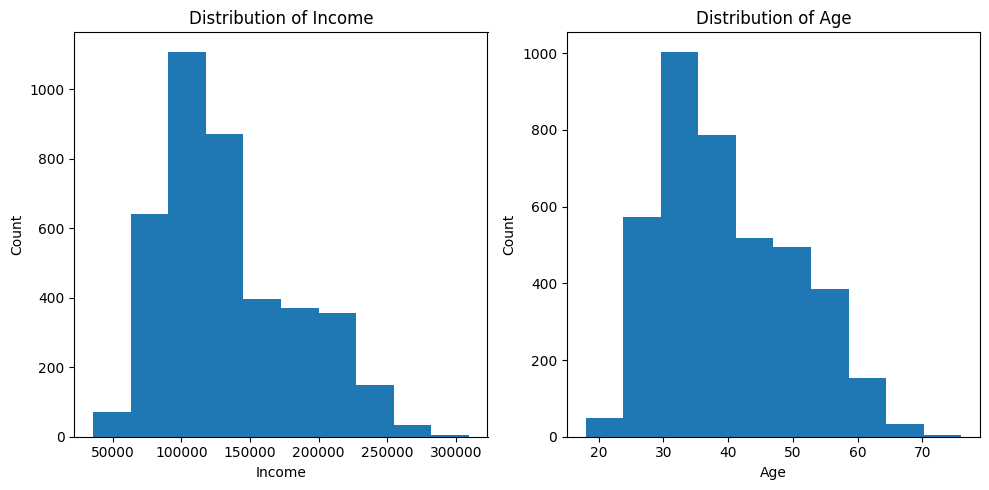

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
plt.title("Distribution of Income")
plt.hist(df["Income"])
plt.xlabel("Income")
plt.ylabel("Count")

plt.subplot(1,2,2)
plt.hist(df["Age"])
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

**Comment:** Income and Age has normal and unimodal distributions although it appears to be slightly left-skewed.

### 2.1 Visualization

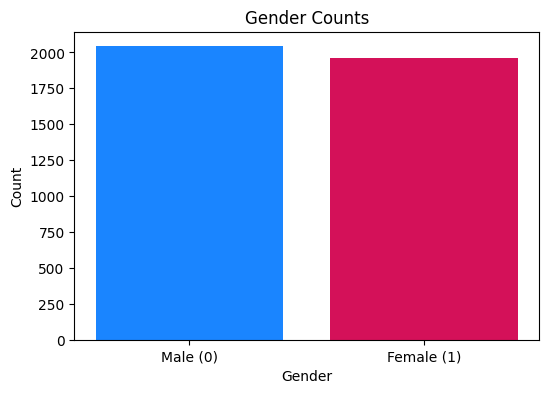

Gender
0    2042
1    1958
Name: count, dtype: int64

In [7]:
## Counts each category in Gender column
gender_counts = df['Gender'].value_counts()

## Draw a bar chart
plt.figure(figsize=(6, 4))
colors = ['#1A85FF', '#D41159']
plt.bar(gender_counts.index, gender_counts.values, color = colors)
plt.xticks([0, 1], ['Male (0)', 'Female (1)'])  # Set ticks to show 0 and 1 only
plt.ylabel("Count")
plt.xlabel("Gender")
plt.title("Gender Counts")
plt.show()

gender_counts

**Analysis:** The number of male consumers are roughly equal to that of females, with 50.95% males and 49.05% females buying items in their supermarket chain.

Text(0.5, 0.98, '')

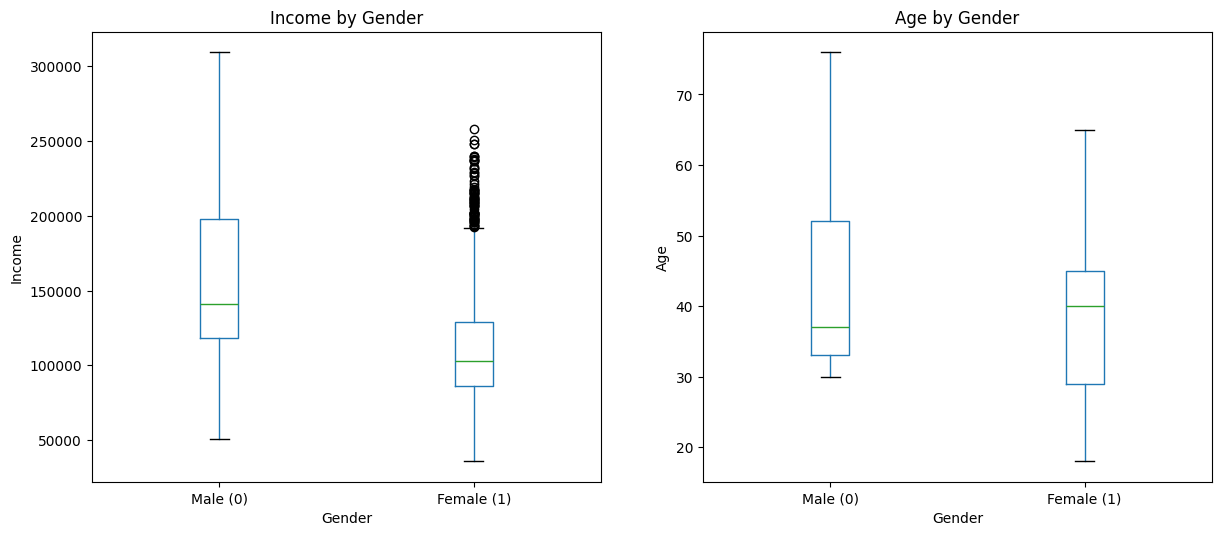

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Box plot for Income by Gender
df.boxplot(by='Gender', column=['Income'], grid=False, ax=ax[0])
ax[0].set_title('Income by Gender')
ax[0].set_xlabel('Gender')
ax[0].set_ylabel('Income')
ax[0].set_xticklabels(['Male (0)', 'Female (1)'])

# Box plot for Age by Gender
df.boxplot(by='Gender', column=['Age'], grid=False, ax=ax[1])
ax[1].set_title('Age by Gender')
ax[1].set_xlabel('Gender')
ax[1].set_ylabel('Age')
ax[1].set_xticklabels(['Male (0)', 'Female (1)'])

# Remove the automatic 'Boxplot grouped by ...' super title
plt.suptitle('')

**Analysis:**

- Income:
    - The spread of income (the distance between the maximum and minimum income values) generated by men is larger than females.
    - The IQR for males is also wider than for females, indicating more variability in male incomes within the inter-quartile range.
    - Females have a wider range of outliers compared to males, suggesting that there are more extreme income values among females.
    - Men income has a median income larger than females.

**-> Overall, while men show greater variability in both general income distribution and within the central range, and a higher median income, women display more extreme income values.**

- Age:
    - The spread of age (the distance between the maximum and minimum age values) generated by females is larger than men.
    - The IQR for males is quite similar to that of females.
    - Females income has a median age larger than males.

**-> Overall, while females exhibit a wider age range and a higher median age, the variability within the central range of ages is similar for both males and females.**

In [9]:
# Count how many marital statuses category observations are within each gender
marital_gender_counts = df.groupby(['Marital Status', 'Gender']).size().unstack(fill_value=0)

## It will show as below
##         Gender      0        1
## Marital Status 
##      0             555     1399
##      1            1475      555

marital_gender_counts.columns = ['Male', 'Female']  # Rename columns

##
## Count how many education levels are within each gender
education_gender_counts = df.groupby(['Education', 'Gender']).size().unstack(fill_value=0)
education_gender_counts.columns = ['Male', 'Female']   # Rename columns

##
## Count how many settlement size are within each gender
settlementSize_gender_counts = df.groupby(['Settlement Size', 'Gender']).size().unstack(fill_value=0)
settlementSize_gender_counts.columns = ['Male', 'Female']   # Rename columns

##
## Count how many settlement size are within each gender
occupation_gender_counts = df.groupby(['Occupation', 'Gender']).size().unstack(fill_value=0)
occupation_gender_counts.columns = ['Male', 'Female']   # Rename columns

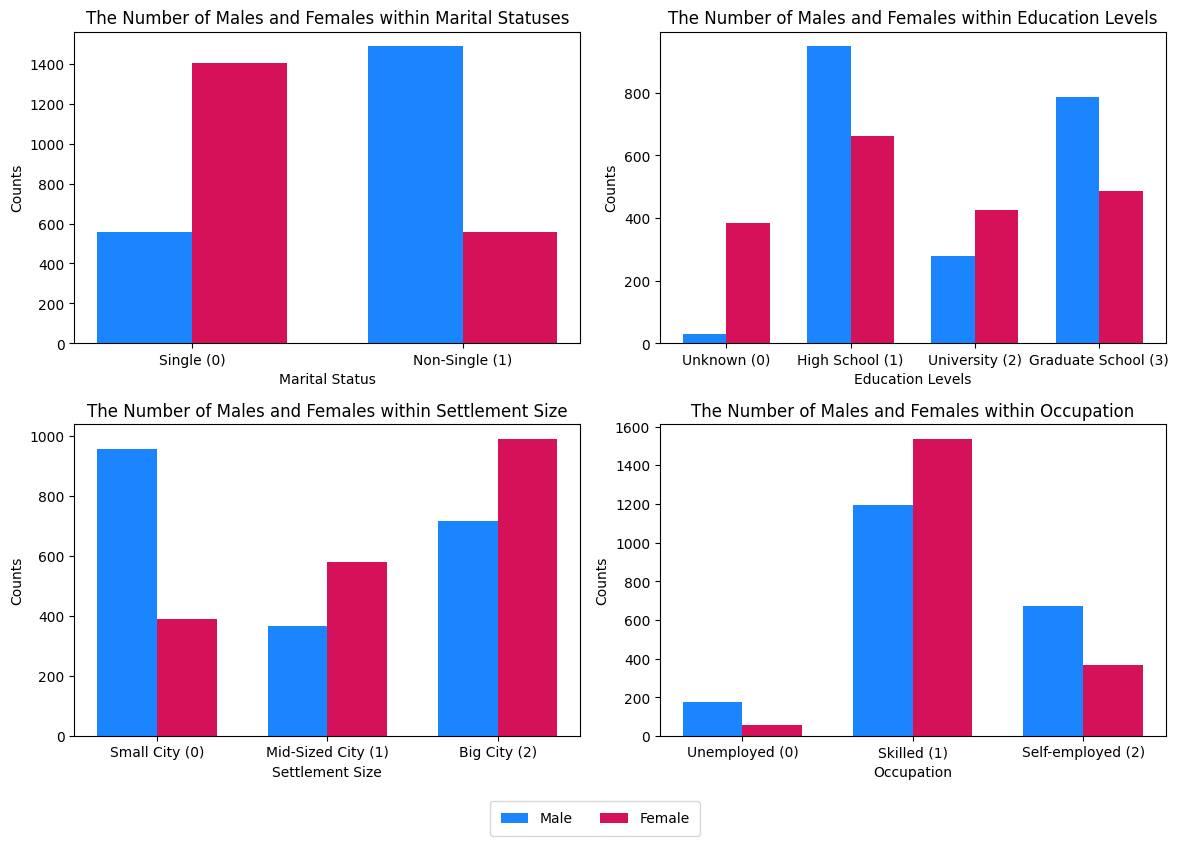

In [10]:
# Parameters
bar_width = 0.35  # width of bars

# Setup figure and axes for two subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

# =============================================================
# First subplot for Marital Status
index = np.arange(len(marital_gender_counts))
ax1.bar(index, marital_gender_counts['Male'], bar_width, label='Male', color='#1A85FF')
ax1.bar(index + bar_width, marital_gender_counts['Female'], bar_width, label='Female', color='#D41159')
ax1.set_xlabel('Marital Status')
ax1.set_ylabel('Counts')
ax1.set_title('The Number of Males and Females within Marital Statuses')
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(['Single (0)', 'Non-Single (1)'])

# =============================================================
# Second subplot for Education
index = np.arange(len(education_gender_counts))
ax2.bar(index, education_gender_counts['Male'], bar_width, label='Male', color='#1A85FF')
ax2.bar(index + bar_width, education_gender_counts['Female'], bar_width, label='Female', color='#D41159')
ax2.set_xlabel('Education Levels')
ax2.set_ylabel('Counts')
ax2.set_title('The Number of Males and Females within Education Levels')
ax2.set_xticks(index + bar_width / 2)
ax2.set_xticklabels(['Unknown (0)', 'High School (1)', "University (2)", "Graduate School (3)"]) 

# =============================================================
# Third subplot for Settlement Size
index = np.arange(len(settlementSize_gender_counts))
ax3.bar(index, settlementSize_gender_counts['Male'], bar_width, label='Male', color='#1A85FF')
ax3.bar(index + bar_width, settlementSize_gender_counts['Female'], bar_width, label='Female', color='#D41159')
ax3.set_xlabel('Settlement Size')
ax3.set_ylabel('Counts')
ax3.set_title('The Number of Males and Females within Settlement Size')
ax3.set_xticks(index + bar_width / 2)
ax3.set_xticklabels(['Small City (0)', 'Mid-Sized City (1)', "Big City (2)"]) 

# =============================================================
# Fourth subplot for Occupation
index = np.arange(len(occupation_gender_counts))
ax4.bar(index, occupation_gender_counts['Male'], bar_width, label='Male', color='#1A85FF')
ax4.bar(index + bar_width, occupation_gender_counts['Female'], bar_width, label='Female', color='#D41159')
ax4.set_xlabel('Occupation')
ax4.set_ylabel('Counts')
ax4.set_title('The Number of Males and Females within Occupation')
ax4.set_xticks(index + bar_width / 2)
ax4.set_xticklabels(['Unemployed (0)', 'Skilled (1)', "Self-employed (2)"]) 

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2, bbox_to_anchor=(0.5,0), borderpad=0.75, labelspacing=1, handlelength=2)

# Display the plot
plt.tight_layout()
plt.show()

Looking at these graph is quite difficult to draw a general conclusion, but here are some key findings in each category:

<u> **1. Marital Status:** </u>

- The number of ***single females*** are ***almost double*** that of ***single males***

- In contrast, for ***non-single individuals***, the number of ***females*** is ***roughly half*** that of ***males***.

<u> **2. Education Levels:** </u>

- Among whose ***education is unknown***, ***females significantly outnumber males*** (approximately 400 and 15 respectively).

- The education level distribution shows that among ***university level***, ***females are slightly more numerous than males***.

- At the ***high school and graduate school level, males outnumber females*** (around 1000 and 700 respectively at high school, and around 800 and 500 respectively).

<u> **3. Settlement Size:** </u>

- In ***small cities, the number of males*** are ***roughly 2.5 times higher than*** that of ***females***, nearly 950 compared with 400 respectively.

- In ***mid-sized and big cities***, ***the number of females are slightly larger than that of males***.

<u> **4. Occupation** </u>

- Among ***skilled workers, females are slightly more numerous than males.***

- Among ***unemployed and self-employed individuals***, there are ***more males than females***.

## 3. Clustering

### 3.1 K-Means Clustering

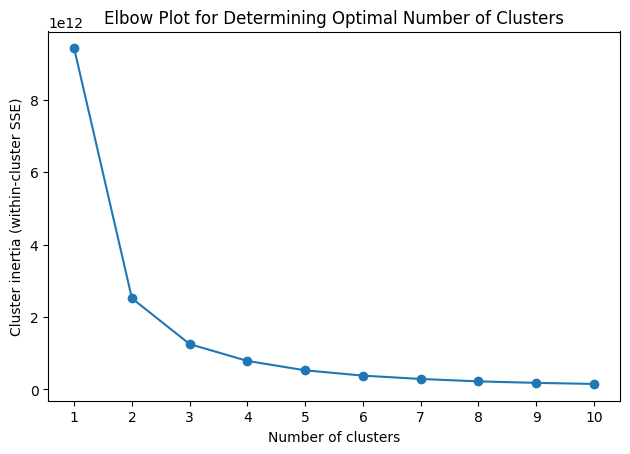

In [11]:
from sklearn.cluster import KMeans

X = df.values
inertias = [] # empty list to store inertia values

# Loop over different values of k to find the optimal number of clusters
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)  # Fit K-means using the PCA-transformed data
    inertias.append(km.inertia_)

# Plotting the elbow plot to observe the 'elbow' point to determine the optimal number of clusters
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster inertia (within-cluster SSE)')
plt.xticks(range(1, 11))
plt.title('Elbow Plot for Determining Optimal Number of Clusters')
plt.tight_layout()
plt.show()


C:\Users\HA VINH NGUYEN\AppData\Local\Temp\ipykernel_28968\3869769359.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = get_cmap("jet")(float(i) / n_clusters)


Silhouette average for 2 clusters: 0.66


C:\Users\HA VINH NGUYEN\AppData\Local\Temp\ipykernel_28968\3869769359.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = get_cmap("jet")(float(i) / n_clusters)


Silhouette average for 3 clusters: 0.57


C:\Users\HA VINH NGUYEN\AppData\Local\Temp\ipykernel_28968\3869769359.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = get_cmap("jet")(float(i) / n_clusters)


Silhouette average for 4 clusters: 0.54


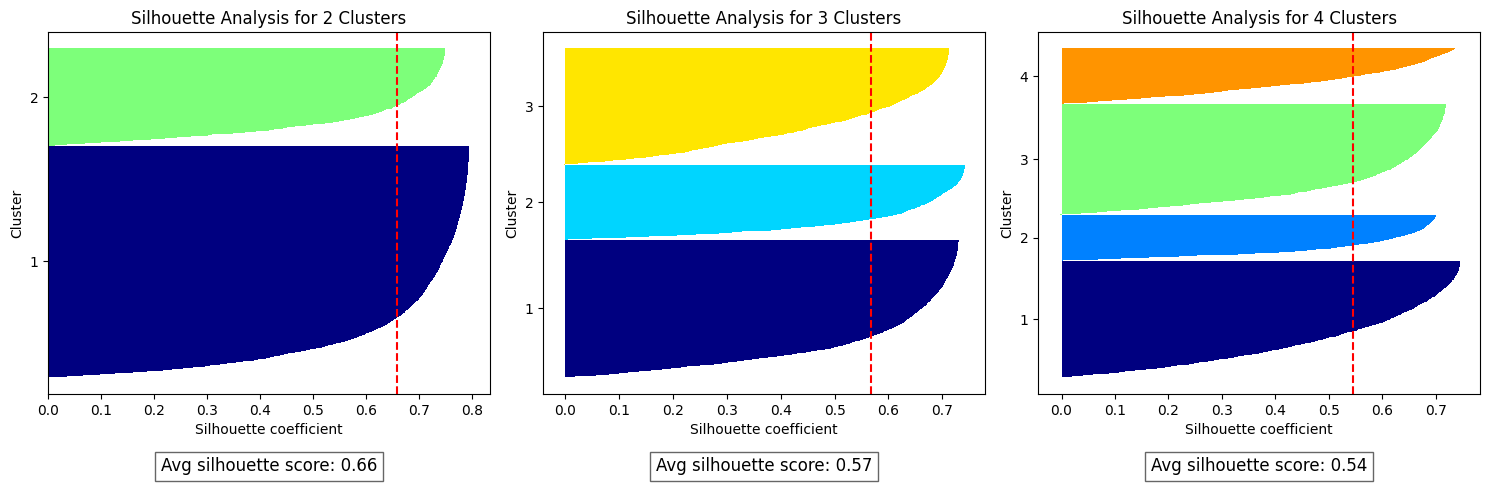

In [12]:
from matplotlib.cm import get_cmap
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

# Define the number of clusters to test
num_clusters = [2, 3, 4]

# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, n_clusters in enumerate(num_clusters):
    km = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300, random_state=0)
    y_km = km.fit_predict(X)

    cluster_labels = np.unique(y_km)
    silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
    
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []

    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = get_cmap("jet")(float(i) / n_clusters)
        axes[idx].barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)
    
    silhouette_avg = np.mean(silhouette_vals)
    print(f'Silhouette average for {n_clusters} clusters: {silhouette_avg:.2f}')

    axes[idx].axvline(silhouette_avg, color="red", linestyle="--")  # plot vertical average line
    axes[idx].set_yticks(yticks)
    axes[idx].set_yticklabels(cluster_labels + 1)
    axes[idx].set_ylabel('Cluster')
    axes[idx].set_xlabel('Silhouette coefficient')
    axes[idx].set_title(f'Silhouette Analysis for {n_clusters} Clusters')

    # Place the silhouette average below the graph
    axes[idx].text(0.5, -0.2, f'Avg silhouette score: {silhouette_avg:.2f}', transform=axes[idx].transAxes, 
                   ha='center', va='center', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.6))

plt.tight_layout()
plt.show()


In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Fit K-means with two clusters using random initialization
km = KMeans(n_clusters=2,  
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)


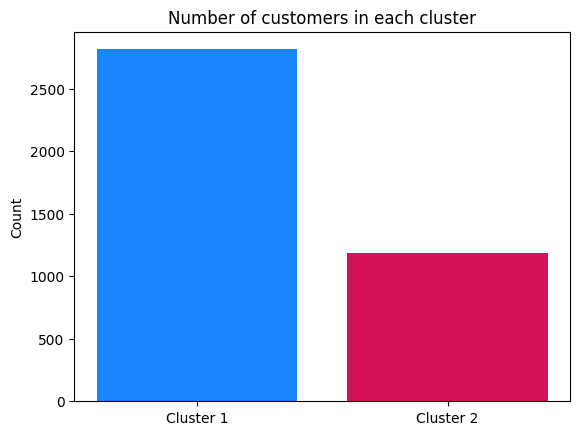

Cluster
1    2816
2    1184
Name: count, dtype: int64

In [14]:
k_means_df = df.copy()
k_means_df['Cluster'] = y_km
k_means_df['Cluster'] = k_means_df['Cluster'].replace({0: 1, 1: 2})
cluster_count_kmeans = k_means_df["Cluster"].value_counts()

plt.bar(cluster_count_kmeans.index, cluster_count_kmeans.values, color = colors)
plt.title("Number of customers in each cluster")
plt.ylabel("Count")
plt.xticks([1, 2], ['Cluster 1', 'Cluster 2'])  # Set ticks to show 0 and 1 only
plt.show()

cluster_count_kmeans


**Analysis:** The number of customers in Cluster 1 (2816 customers) is significantly higher than Cluster 2 (1184 customers), with a difference of 632 customers. This suggests that Cluster 1 is the dominant cluster, representing a larger portion of the customer base.

In [15]:
## select cluster 1 only
cluster_1 = k_means_df[k_means_df["Cluster"] == 1].reset_index(drop=True)

## descriptive statistics for cluster 1
cluster_1.describe()

,Gender,Marital Status,Education,Settlement Size,Occupation,Income,Age,Cluster
count,2816.000000,2816.000000,2816.000000,2816.000000,2816.000000,2816.000000,2816.000000,2816.0
mean,0.579545,0.503906,1.316761,0.920455,0.992543,107414.140625,34.881037,1.0
std,0.493720,0.500074,0.844047,0.811153,0.356041,23306.697362,6.536661,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,35832.000000,18.000000,1.0
25%,0.000000,0.000000,1.000000,0.000000,1.000000,90251.500000,30.000000,1.0
50%,1.000000,1.000000,1.000000,1.000000,1.000000,107697.500000,34.000000,1.0
75%,1.000000,1.000000,2.000000,2.000000,1.000000,125779.250000,39.000000,1.0
max,1.000000,1.000000,3.000000,2.000000,2.000000,152890.000000,51.000000,1.0


- Gender:

    - Mean: 0.579545
    - About 57.95% of the individuals in this cluster are female, which means 42.05% are male.

- Marital Status:

    - Mean: 0.503906
    - About 50.39% of the individuals in this cluster are non-single (divorced, separated, married, or widowed), and 49.61% are single.

- Education:

    - Mean: 1.316761
    - The average education level is slightly above 1, which means most individuals in this cluster have a high school to university level education.

-   Settlement Size:

    - Mean: 0.920455
    - Most individuals in this cluster live in mid-sized to big cities (since the value is close to 1).

- Occupation:

    - Mean: 0.992543
    - The majority of individuals in this cluster are skilled employees or officials (since the value is close to 1).

-  Income:

    - Mean: 107414.140625
    - The average income is moderate, with a mean value of 107,414 USD.

- Age:

    - Mean: 34.881037
    - The average age is around 35 years, indicating that this cluster consists of middle-aged individuals.

**--> Conclusion:** 

Overall, Cluster 1 represents a group of predominantly middle-aged, moderately wealthy females with education levels between high school and university living in mid-sized to big cities with skilled employee or official roles and a balanced proportion of single and non-single individuals.

In [16]:
## select cluster 2 only
cluster_2 = k_means_df[k_means_df["Cluster"] == 2].reset_index(drop=True)

## descriptive statistics for cluster 2
cluster_2.describe()

,Gender,Marital Status,Education,Settlement Size,Occupation,Income,Age,Cluster
count,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.0
mean,0.275338,0.526182,2.639358,1.493243,1.695946,198426.477196,51.993243,2.0
std,0.446873,0.499525,0.786082,0.870259,0.534950,28872.526425,6.965799,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,153092.000000,39.000000,2.0
25%,0.000000,0.000000,3.000000,0.000000,1.000000,175002.500000,48.000000,2.0
50%,0.000000,1.000000,3.000000,2.000000,2.000000,196633.000000,52.000000,2.0
75%,1.000000,1.000000,3.000000,2.000000,2.000000,218490.000000,57.000000,2.0
max,1.000000,1.000000,3.000000,2.000000,2.000000,309364.000000,76.000000,2.0


- Gender:

    - Mean: 0.275338
    - About 27.53% of the individuals in this cluster are female, which means 72.47% are male.

- Marital Status:

    - Mean: 0.526182
    - About 52.62% of the individuals in this cluster are non-single (divorced, separated, married, or widowed), and 47.38% are single.

- Education:

    - Mean: 2.639358
    - The average education level is close to 3, which means most individuals in this cluster have university to graduate school education.

- Settlement Size:

    - Mean: 1.493243
    - Most individuals in this cluster live in mid-sized to big cities (since the value is between 1 and 2).

- Occupation:

    - Mean: 1.695946
    - The majority of individuals in this cluster are in skilled employee, official, management, self-employed, or highly qualified employee/officer roles (since the value is close to 2).

- Income:

    - Mean: 198426.477196
    - The average income is relatively high, with a mean value of approximately 198,426 USD.

- Age:

    - Mean: 51.993243
    - The average age is around 52 years, indicating that this cluster consists of older individuals.

**--> Conclusion:** 

Overall, Cluster 2 represents a group of predominantly older, wealthy males with education levels between university and graduate school living in mid-sized to big cities with high-level occupations and a balanced proportion of single and non-single individuals.

### 3.2 Agglomerative Clustering

In [17]:
from sklearn.cluster import AgglomerativeClustering

# Define the Agglomerative Clustering model
ac = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='complete')
y_ac = ac.fit_predict(X)

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage
X = df.values.T  # Transpose the DataFrame to cluster features instead of samples
# Generate the linkage matrix for features
Z = linkage(X, method='complete', metric='euclidean')

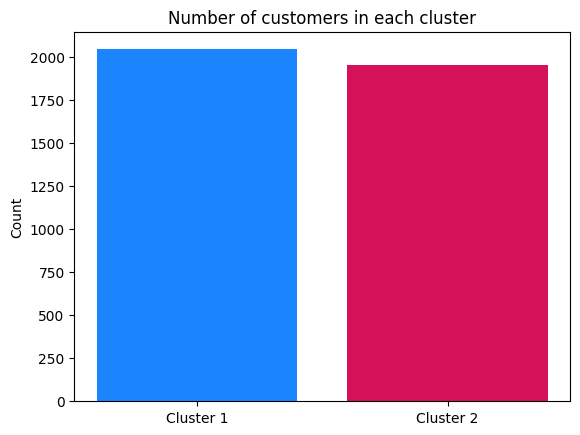

Cluster
1    2046
2    1954
Name: count, dtype: int64

In [19]:
agglomerative_df = df.copy()
agglomerative_df['Cluster'] = y_ac
agglomerative_df['Cluster'] = agglomerative_df['Cluster'].replace({0: 1, 1: 2})
cluster_count_agglomerative = agglomerative_df["Cluster"].value_counts()

plt.bar(cluster_count_agglomerative.index, cluster_count_agglomerative.values, color = colors)
plt.title("Number of customers in each cluster")
plt.ylabel("Count")
plt.xticks([1, 2], ['Cluster 1', 'Cluster 2'])  # Set ticks to show 0 and 1 only
plt.show()

cluster_count_agglomerative

In [20]:
## select cluster 1 only
cluster_1 = agglomerative_df[agglomerative_df["Cluster"] == 1].reset_index(drop=True)

## descriptive statistics for cluster 0
cluster_1.describe()

,Gender,Marital Status,Education,Settlement Size,Occupation,Income,Age,Cluster
count,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.0
mean,0.291789,0.661779,1.930596,0.951124,1.356794,171562.022483,46.502933,1.0
std,0.454697,0.473220,1.074748,0.986737,0.614232,38788.971742,9.152537,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,121424.000000,32.000000,1.0
25%,0.000000,0.000000,1.000000,0.000000,1.000000,136368.500000,38.000000,1.0
50%,0.000000,1.000000,2.000000,0.000000,1.000000,164287.000000,47.000000,1.0
75%,1.000000,1.000000,3.000000,2.000000,2.000000,201848.250000,53.000000,1.0
max,1.000000,1.000000,3.000000,2.000000,2.000000,309364.000000,76.000000,1.0


- Gender:

    - Mean: 0.291789
    - About 29.18% of the individuals in this cluster are female, which means 70.82% are male.

- Marital Status:

    - Mean: 0.661779
    - About 66.18% of the individuals in this cluster are non-single (divorced, separated, married, or widowed), and 33.82% are single.

- Education:

    - Mean: 1.930596
    - The average education level is close to 2, which means most individuals in this cluster have university education.

- Settlement Size:

    - Mean: 0.951124
    - Most individuals in this cluster live in mid-sized to big cities (since the value is close to 1).

- Occupation:

    - Mean: 1.356794
    - The majority of individuals in this cluster are in skilled employee, official, or management roles (since the value is between 1 and 2).

- Income:

    - Mean: 171562.022483
    - The average income is relatively high, with a mean value of approximately 171,562 USD.

- Age:

    - Mean: 46.502933
    - The average age is around 46.5 years, indicating that this cluster consists of older individuals.

**--> Conclusion:** 

Overall, Cluster 1 represents a group of predominantly older, wealthy males with university level living in mid-sized to big cities with skilled employee, official, or management roles and a higher proportion of non-single individuals.

In [21]:
## select cluster 2 only
cluster_2 = agglomerative_df[agglomerative_df["Cluster"] == 2].reset_index(drop=True)

## descriptive statistics for cluster 1
cluster_2.describe()

,Gender,Marital Status,Education,Settlement Size,Occupation,Income,Age,Cluster
count,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.0
mean,0.696520,0.352098,1.475435,1.235415,1.037359,95393.690379,33.080860,2.0
std,0.459878,0.477747,0.912260,0.697339,0.346346,16693.562195,6.003891,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,35832.000000,18.000000,2.0
25%,0.000000,0.000000,1.000000,1.000000,1.000000,83622.750000,29.000000,2.0
50%,1.000000,0.000000,1.000000,1.000000,1.000000,97183.500000,32.000000,2.0
75%,1.000000,1.000000,2.000000,2.000000,1.000000,109110.000000,38.750000,2.0
max,1.000000,1.000000,3.000000,2.000000,2.000000,121330.000000,45.000000,2.0


- Gender:

    - Mean: 0.696520
    - About 69.65% of the individuals in this cluster are female, which means 30.35% are male.

- Marital Status:

    - Mean: 0.352098
    - About 35.21% of the individuals in this cluster are non-single (divorced, separated, married, or widowed), and 64.79% are single.

- Education:

    - Mean: 1.475435
    - The average education level is slightly above 1, which means most individuals in this cluster have a high school to university level education.

- Settlement Size:

    - Mean: 1.235415
    - Most individuals in this cluster live in mid-sized to big cities (since the value is between 1 and 2).

- Occupation:

    - Mean: 1.037359
    - The majority of individuals in this cluster are skilled employees or officials (since the value is close to 1).

- Income:

    - Mean: 95393.690379
    - The average income is moderate, with a mean value of approximately 95,394 USD.

- Age:

    - Mean: 33.080860
    - The average age is around 33 years, indicating that this cluster consists of younger individuals.

**--> Conclusion:**

Cluster 2 represents a group of predominantly younger, moderately wealthy females with education levels between high school and university living in mid-sized to big cities with skilled employee or official roles and a higher proportion of single individuals

## 4. K-Means and Agglomerative Clustering Insight Comparison

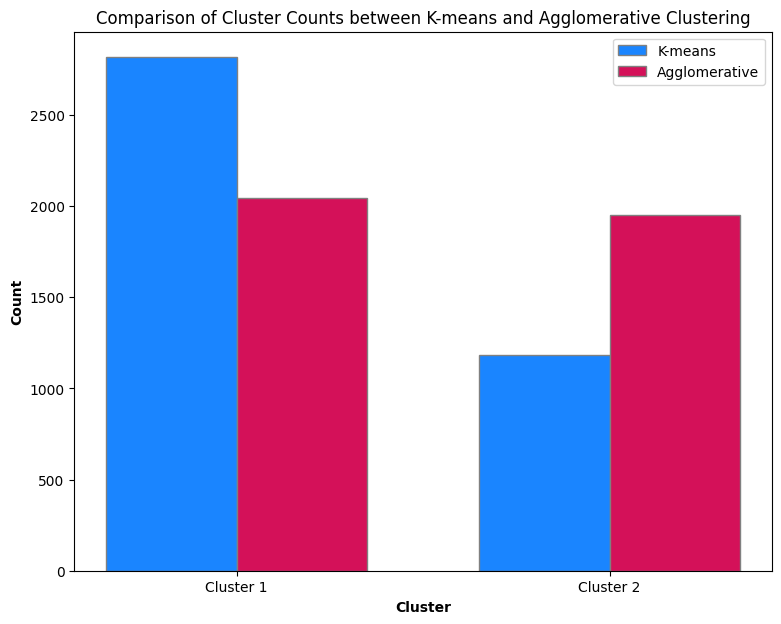

In [22]:
cluster_count_kmeans = cluster_count_kmeans.sort_index()
cluster_count_agglomerative = cluster_count_agglomerative.sort_index()

# Convert to values
cluster_count_kmeans_values = cluster_count_kmeans.values
cluster_count_agglomerative_values = cluster_count_agglomerative.values

# Define the labels and bar width
labels = ['Cluster 1', 'Cluster 2']
barWidth = 0.35

# Set position of bar on X axis
r1 = np.arange(len(cluster_count_kmeans_values))
r2 = [x + barWidth for x in r1]

# Make the plot
plt.figure(figsize=(9, 7))
plt.bar(r1, cluster_count_kmeans_values, color='#1A85FF', width=barWidth, edgecolor='grey', label='K-means')
plt.bar(r2, cluster_count_agglomerative_values, color='#D41159', width=barWidth, edgecolor='grey', label='Agglomerative')

# Add xticks on the middle of the group bars
plt.xlabel('Cluster', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Comparison of Cluster Counts between K-means and Agglomerative Clustering')
plt.xticks([r + barWidth/2 for r in range(len(cluster_count_kmeans_values))], labels)

# Create legend & Show graphic
plt.legend()
plt.show()

Revise what we have discovered in the outputs of the two algorithms:

| Description      | K-Means++_Cluster1                                     | K-Means++_Cluster2                                          | Agglomerative_Cluster1                                      | Agglomerative_Cluster2                                         |
|------------------|------------------------------------------------------|-----------------------------------------------------------|------------------------------------------------------------|---------------------------------------------------------------|
| Age              | Middle-aged                                          | Older                                                     | Older                                                      | Younger                                                       |
| Education        | High school to University                            | University to Graduate School                              | University                                                 | High school to University                                     |
| Income           | Moderately wealthy                                   | Wealthy                                                    | Wealthy                                                    | Moderately wealthy                                            |
| Gender           | Predominantly females                                | Predominantly males                                        | Predominantly males                                         | Predominantly females                                         |
| Marital Status   | Balanced proportion of single and non-single         | Balanced proportion of single and non-single               | Higher proportion of non-single individuals                 | Higher proportion of single individuals                       |
| Settlement Size  | Mid-sized to big cities                              | Mid-sized to big cities                                    | Mid-sized to big cities                                     | Mid-sized to big cities                                       |
| Occupation       | Skilled employees or official roles                  | High-level occupations                                     | Skilled employees, official, or management roles            | Skilled employees or official roles                           |



### Overlap and Differences:

- K-Means++ Cluster 1 vs. Agglomerative Cluster 1:
    - Overlap: Settlement Size, Occupation
    - Differences: Age, Education, Income, Gender, Marital Status

- K-Means++ Cluster 2 vs. Agglomerative Cluster 2:
    - Overlap: Settlement Size, Occupation
    - Differences: Age, Education, Income, Gender, Marital Status

**--> Conclusion**

After the data are clustered into 2 different groups, there are obvious distinctions. In general, the first clusters identified by two techniques both have higher number of data points than the second clusters have.

The first cluster identified by Kmeans++ is totally different compared to the first cluster identified by agglomerative clustering. Looking at the comparison table, the Kmeans++ first cluster appears to be the second cluster in agglomerative clustering. This pattern also applies to Kmeans++ second cluster, which is more identical to the first cluster in agglomerative clustering.


Suggestions tailored for the two clusters identified by Kmeans++:

- Cluster 1: Middle-aged, Moderately Wealthy Females with Education Levels between High School and University Living in Mid-Sized to Big Cities with Skilled Employee or Official Roles
    - Goal: Enhance work-life balance and convenience.
        - Promote time-saving products and services: Offer ready-to-eat meals, meal kits, and quick recipes that fit into their busy schedules.
        - Loyalty Programs: Introduce loyalty programs with exclusive deals on household essentials and personal care products.
        - Community Engagement: Organize local community events or online forums where they can share tips on managing work-life balance and get recommendations for related products.
        - Health and Wellness: Provide newsletters with health tips and promote fitness-related products and services, such as gym memberships or wellness workshops.

- Cluster 2: Older, Wealthy Males with Education Levels between University and Graduate School Living in Mid-Sized to Big Cities with High-Level Occupations
    - Goal: Focus on premium quality and luxury.
        - Premium Product Lines: Emphasize high-end product lines, such as gourmet foods, premium wines, and exclusive brands.
        - Personalized Services: Offer personalized shopping experiences, such as personal shoppers, custom orders, and home delivery services tailored to their preferences.
        - Exclusive Events: Invite them to exclusive events like wine tastings, cooking classes, and gourmet food festivals.
        - Health and Wellness: Highlight the health benefits of premium products and provide tailored health and wellness programs, including private fitness sessions and wellness retreats.

## 5. Summary

KMeans++ and Agglomerative clustering segmented a dataset of 4,000 customers using variables like age,
gender, income, education, marital status, and settlement size. This resulted in two main segments, enabling
targeted and effective marketing strategies to attract the right customers with the right demands at the right
time.